<a href="https://colab.research.google.com/github/brunorodriguesti/BFT_Rating_Features/blob/main/Preparing_data_bug_fix_time_Reputation_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
cd Colab\ Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import nltk
from sklearn.feature_selection import chi2

In [ ]:
dataset = 'N'
#dataset = 'E'
#Eclipse Product
#Eclipse Plataform = cod 1
#Eclipse JDT = cod 3
#Eclipse birt = cod 24
#Eclipse PDE = cod 2
#product = 1


In [ ]:
#Select the dataset
nameDataset=""
if dataset == 'N':
  data_bug = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/netbeans-dataset.csv', low_memory=False)
  nameDataset='NetBeans'
  print('Netbeans loaded')

else:
  data_bug = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/eclipse_dataset.csv', low_memory=False)
  nameDataset='Eclipse'
  print('Eclipse loaded')


Netbeans loaded


In [ ]:
data_bug['year_creation'] = pd.to_numeric(pd.DatetimeIndex(data_bug['creation_ts']).year)
data_bug['year_creation_n'] = pd.to_datetime(data_bug['creation_ts']).dt.to_period('Y')
data_bug['month_creation'] = pd.DatetimeIndex(data_bug['creation_ts']).month
data_bug['year_lastdiffed'] = pd.DatetimeIndex(data_bug['lastdiffed']).year
data_bug['month_lastdiffed'] = pd.DatetimeIndex(data_bug['lastdiffed']).month
bugfix = data_bug[(data_bug['resolution'] == 'FIXED') & (data_bug['lastdiffed'].notna())]

In [ ]:
list(data_bug)

['bug_id',
 'assigned_to',
 'bug_severity',
 'priority',
 'bug_status',
 'creation_ts',
 'delta_ts',
 'short_desc',
 'short_desc.1',
 'comments',
 'op_sys',
 'rep_platform',
 'reporter',
 'version',
 'resolution',
 'lastdiffed',
 'estimated_time',
 'product_id',
 'component_id',
 'days',
 'year_creation',
 'year_creation_n',
 'month_creation',
 'year_lastdiffed',
 'month_lastdiffed']

In [ ]:
data_bug['creation_s'] = pd.to_datetime(data_bug['creation_ts']).dt.date

In [ ]:
data_bug['creation_s']

0        2009-11-07
1        2009-11-08
2        2009-11-08
3        2009-11-08
4        2009-11-08
            ...    
12086    2010-06-29
12087    2010-06-29
12088    2010-06-29
12089    2010-06-29
12090    2010-06-29
Name: creation_s, Length: 12091, dtype: object

In [ ]:
#Eclipse
if dataset == 'E':
  if product == 1:
    # Eclipse Plataform = cod 1
    data_bug = data_bug[data_bug['product_id']==1]
    nameDataset= 'Eclipse_Plataform'
  elif product == 3:
    #Eclipse JDT = cod 3
    data_bug = data_bug[data_bug['product_id']==3]
    nameDataset = 'Eclipse_JDT'
  elif product == 24:
    #Eclipse birt = cod 24
    data_bug = data_bug[data_bug['product_id']==24]
    nameDataset = 'Eclipse_Birt'
  elif product == 2:
    #Eclipse PDE = cod 2
    data_bug = data_bug[data_bug['product_id']==2]
    nameDataset = 'Eclipse_PDE'
  else:
    print('Select a product for Eclipse')
print ('Dataset selected '+ nameDataset)
treatOutlier = False


Dataset selected NetBeans


In [ ]:
if dataset != 'N':
  data_bug = data_bug.loc[data_bug['year_creation'].isin([2008, 2009, 2010])]

In [ ]:
data_bug['year_creation'].value_counts()

2010    9042
2009    3049
Name: year_creation, dtype: int64

#Reputation

In [ ]:
lista_reputation_user = []
def reputation_calculate(index, bug_id, user, resolution, reputacao):
  added = 0
  if len(lista_reputation_user ) == 0:
    reputation_dic = {}
    reputation_dic['index']=index
    reputation_dic['user'] = user
    reputation_dic['resolution'] = resolution
    reputation_dic['opened'] = 1
    if resolution == 'FIXED':
      reputation_dic['fixed'] = 1
    else:
      reputation_dic['fixed'] = 0
    reputation_dic['reputation']= 0
    lista_reputation_user.append(reputation_dic.copy())
    return reputation_dic['reputation']



  for lista in lista_reputation_user :
    if lista['user'] == user:
      index_aux= lista['index']
      opened = lista['opened']
      fixed = lista['fixed']
      lista_reputation_user[index_aux]['opened'] = lista['opened']+1


      if resolution == 'FIXED':
        lista_reputation_user[index_aux]['fixed']= lista['fixed']+1
      else:
        lista_reputation_user[index_aux]['fixed']= lista['fixed']


      reputacao = fixed/ (opened+1)
      lista_reputation_user[index_aux]['reputacao']=reputacao
      return reputacao


  for lista in lista_reputation_user :
    reputation_dic = {}
    reputation_dic['index']=index
    reputation_dic['user'] = user
    reputation_dic['resolution'] = resolution
    reputation_dic['opened'] = 1
    if resolution == 'FIXED':
      reputation_dic['fixed'] = 1
    else:
      reputation_dic['fixed'] = 0
    reputation_dic['reputation']= 0
    lista_reputation_user.append(reputation_dic.copy())
    return reputation_dic['reputation']


In [ ]:
data_bug['reporter_reputation_new']=0
data_bug['developer_reputation']=0

In [ ]:
#New reputation
lista_reputation_user.clear
i=0
index=0
print('Start reporter reputation calculate number of bugs' + str(data_bug.shape[0]))
for indexz, bug in data_bug.iterrows() :
   reputataion_var = reputation_calculate(index, bug['bug_id'], bug['reporter'], bug['resolution'], bug['reporter_reputation_new'])
   index= len(lista_reputation_user)
   data_bug.loc[indexz, 'reporter_reputation_new'] = reputataion_var
   i=i+1

print ('End reporter reputation calculate')



Start reporter reputation calculate number of bugs12091
End reporter reputation calculate


In [ ]:
lista_reputation_user.clear
index=0
i=0
print('Start developer reputation calculate number of bugs' + str(data_bug.shape[0]))
for indexz, bug in data_bug.iterrows() :
   reputataion_var = reputation_calculate(index, bug['bug_id'], bug['assigned_to'], bug['resolution'], bug['developer_reputation'])
   data_bug.loc[indexz, 'developer_reputation_new'] = reputataion_var
   i=i+1

print ('End developer reputation calculate')
lista_reputation_user.clear
index=0
i=0


Start developer reputation calculate number of bugs12091
End developer reputation calculate


In [ ]:
data_bug[['bug_id', 'resolution', 'assigned_to', 'developer_reputation', 'developer_reputation_new', 'reporter',  'reporter_reputation_new']]

,bug_id,resolution,assigned_to,developer_reputation,developer_reputation_new,reporter,reporter_reputation_new
0,176097,FIXED,79117,0,0.454545,79117,0.000000
1,176098,INVALID,186,0,0.664062,182,0.000000
2,176099,NaN,201,0,0.565217,201,0.000000
3,176100,NaN,526,0,0.000000,79117,0.500000
4,176101,WORKSFORME,503,0,0.000000,88459,0.000000
...,...,...,...,...,...,...,...
12086,188183,NaN,23,0,0.527675,23,0.493902
12087,188184,NaN,164,0,0.500000,524,0.538889
12088,188185,NaN,236,0,0.000000,92280,0.000000
12089,188186,NaN,172,0,0.000000,90793,0.000000


#Analyzing the dataset

In [ ]:
data_bug.describe()

,bug_id,assigned_to,reporter,estimated_time,product_id,component_id,days,year_creation,month_creation,year_lastdiffed,month_lastdiffed,reporter_reputation_new,developer_reputation,developer_reputation_new
count,12091.000000,12091.000000,12091.000000,12091.0,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.000000,12091.0,12091.000000
mean,182142.000000,5143.906707,38797.014474,0.0,17.606898,355.197502,24.686296,2009.747829,5.601191,2009.861881,5.053180,0.319553,0.0,0.412375
std,3490.515387,17789.886422,38204.010396,0.0,10.742388,228.556037,41.686640,0.434277,3.625716,0.345039,2.920717,0.269879,0.0,0.243565
min,176097.000000,2.000000,2.000000,0.0,2.000000,42.000000,0.000000,2009.000000,1.000000,2009.000000,1.000000,0.000000,0.0,0.000000
25%,179119.500000,134.000000,216.000000,0.0,8.000000,178.000000,1.000000,2009.000000,3.000000,2010.000000,3.000000,0.000000,0.0,0.236033
50%,182142.000000,253.000000,28332.000000,0.0,16.000000,316.000000,5.000000,2010.000000,4.000000,2010.000000,5.000000,0.300000,0.0,0.483871
75%,185164.500000,495.000000,79931.000000,0.0,24.000000,440.000000,28.000000,2010.000000,11.000000,2010.000000,6.000000,0.551724,0.0,0.589574
max,188187.000000,92146.000000,92280.000000,0.0,40.000000,1089.000000,229.000000,2010.000000,12.000000,2010.000000,12.000000,0.969697,0.0,0.974359


In [ ]:
data_bug.shape

(12091, 29)

In [ ]:
 data_bug['reporter'].nunique()

2416

In [ ]:
data_bug['assigned_to'].nunique()

219

In [ ]:
data_bug.groupby('reporter').size()

reporter
2         53
3        268
5         52
6         87
9          6
        ... 
92270      1
92271      1
92273      1
92278      2
92280      1
Length: 2416, dtype: int64

In [ ]:
list(data_bug)

['bug_id',
 'assigned_to',
 'bug_severity',
 'priority',
 'bug_status',
 'creation_ts',
 'delta_ts',
 'short_desc',
 'short_desc.1',
 'comments',
 'op_sys',
 'rep_platform',
 'reporter',
 'version',
 'resolution',
 'lastdiffed',
 'estimated_time',
 'product_id',
 'component_id',
 'days',
 'year_creation',
 'year_creation_n',
 'month_creation',
 'year_lastdiffed',
 'month_lastdiffed',
 'creation_s',
 'reporter_reputation_new',
 'developer_reputation',
 'developer_reputation_new']

In [ ]:
data_bug['bug_status'].value_counts()

RESOLVED    6338
NEW         3783
VERIFIED    1467
CLOSED       204
REOPENED     187
STARTED      112
Name: bug_status, dtype: int64

In [ ]:
 data_bug['resolution'].value_counts()

FIXED         4747
DUPLICATE     1501
WORKSFORME     576
INVALID        410
WONTFIX        406
INCOMPLETE     369
Name: resolution, dtype: int64

In [ ]:
data_bug['bug_severity'].value_counts()

normal         12088
enhancement        3
Name: bug_severity, dtype: int64

In [ ]:
data_bug['priority'].value_counts()

P3    9124
P2    1785
P1     655
P4     527
Name: priority, dtype: int64

In [ ]:
bugfix = data_bug[(data_bug['resolution'] == 'FIXED') & (data_bug['lastdiffed'].notna())]
bugdifzero = bugfix[bugfix['days'] != 0]

In [ ]:
bugfix.shape

(4747, 29)

In [ ]:
bugfix['days'].describe()

count    4747.000000
mean       27.358332
std        40.299980
min         0.000000
25%         3.000000
50%         9.000000
75%        33.000000
max       217.000000
Name: days, dtype: float64

In [ ]:
bugfix['days'].median()

9.0

In [ ]:
priority = bugfix[(bugfix['priority'] == 'P1')]

priority['days'].describe()

count    420.000000
mean      20.802381
std       34.926879
min        0.000000
25%        3.000000
50%        7.000000
75%       19.000000
max      217.000000
Name: days, dtype: float64

In [ ]:
priority['days'].median()

7.0

In [ ]:
print(priority['days'].mode())

0    1
dtype: int64


In [ ]:
severity = bugfix[(bugfix['bug_severity'] == 'enhancement')]

severity['days'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: days, dtype: float64

In [ ]:
severity['days'].mode()

Series([], dtype: int64)

In [ ]:
severity['days'].median()

nan

In [ ]:
severity[['short_desc', 'comments']]

,short_desc,comments


In [ ]:
bugfix['product_id'].value_counts()

3     589
16    465
13    336
22    329
15    302
23    285
4     283
8     265
36    169
6     147
25    146
40    139
2     136
37    134
29    104
30     96
11     92
28     85
38     76
31     73
14     72
24     55
7      54
9      52
35     46
33     43
12     39
39     36
5      32
18     14
34     14
17      9
21      8
10      8
19      7
27      4
26      3
Name: product_id, dtype: int64

In [ ]:
bugfix[['product_id', 'days']]

,product_id,days
0,27,23
5,40,79
8,15,26
9,40,19
10,40,198
...,...,...
12026,13,1
12040,36,1
12046,12,1
12047,23,1


In [ ]:
bugfix['assigned_to'].nunique()

166

In [ ]:
bugfix.columns

Index(['bug_id', 'assigned_to', 'bug_severity', 'priority', 'bug_status',
       'creation_ts', 'delta_ts', 'short_desc', 'op_sys', 'rep_platform',
       'reporter', 'version', 'resolution', 'lastdiffed', 'estimated_time',
       'product_id', 'component_id', 'short_desc.1', 'comments', 'days',
       'year_creation', 'year_creation_n', 'month_creation', 'year_lastdiffed',
       'month_lastdiffed', 'creation_s', 'reporter_reputation_new',
       'developer_reputation', 'developer_reputation_new'],
      dtype='object')

In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['assigned_to'].agg(np.count_nonzero))

year_lastdiffed
2009     663
2010    4084
Name: assigned_to, dtype: int64


In [ ]:
bugYear = bugfix.groupby('year_creation')
print(bugYear['reporter'].agg(np.count_nonzero))

year_creation
2009    1262
2010    3485
Name: reporter, dtype: int64


Calcular a média de tempo de resolução de bugs por ano

In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['days'].agg(np.mean))

year_lastdiffed
2009     7.404223
2010    30.597698
Name: days, dtype: float64


In [ ]:
bugYear = bugfix.groupby('year_lastdiffed')
print(bugYear['product_id'].agg(np.count_nonzero))

year_lastdiffed
2009     663
2010    4084
Name: product_id, dtype: int64


#Outliers


In [ ]:
bugfix['days'].describe()

count    4747.000000
mean       27.358332
std        40.299980
min         0.000000
25%         3.000000
50%         9.000000
75%        33.000000
max       217.000000
Name: days, dtype: float64

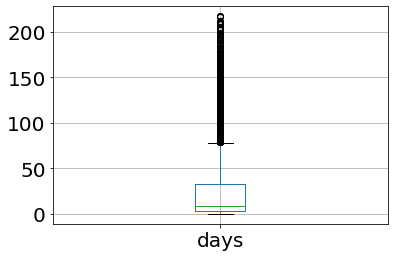

In [ ]:
#Tentar usar o log
bugfix.boxplot(column='days', fontsize=20)
plt.show()

In [ ]:
bugfix.columns

Index(['bug_id', 'assigned_to', 'bug_severity', 'priority', 'bug_status',
       'creation_ts', 'delta_ts', 'short_desc', 'op_sys', 'rep_platform',
       'reporter', 'version', 'resolution', 'lastdiffed', 'estimated_time',
       'product_id', 'component_id', 'short_desc.1', 'comments', 'days',
       'year_creation', 'year_creation_n', 'month_creation', 'year_lastdiffed',
       'month_lastdiffed', 'creation_s', 'reporter_reputation_new',
       'developer_reputation', 'developer_reputation_new'],
      dtype='object')

In [ ]:
quantirl1, quantirl3 = np.percentile(bugfix['days'], [25, 75])
print(quantirl1)
print(quantirl3)

3.0
33.0


In [ ]:
bugfix.shape

(4747, 29)

In [ ]:
bug_q3 = bugfix[bugfix['days'] > quantirl3]
bug_q0 = bugfix[bugfix['days'] == 0]


print ('maior que o quartil: ' + str(bug_q3['days'].count()) + ' zero :' + str(bug_q0['days'].count()))

maior que o quartil: 1167 zero :316


In [ ]:
bugfix_filter1 = bugfix[bugfix['days'] < quantirl3]
bugfix_filter2 = bugfix_filter1[bugfix['days'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
#bugfix_filter2['days'].median()
bugfix_filter1['days'].median()

5.0

In [ ]:
median = bugfix_filter1['days'].median()
bugfixclass = bugfix_filter1
pd.options.mode.chained_assignment = None
bugfixclass.loc[bugfixclass['days'] <=median, 'classification'] = 0
bugfixclass.loc[bugfixclass['days'] >median, 'classification'] = 1


'''Counting with zero as outlier'''
#median = bugfix_filter2['days'].median()
#bugfixclass = bugfix_filter2
#pd.options.mode.chained_assignment = None
#bugfixclass.loc[bugfixclass['days'] <=median, 'classification'] = 0
#bugfixclass.loc[bugfixclass['days'] >median, 'classification'] = 1



'Counting with zero as outlier'

In [ ]:
bugfixclass.columns

Index(['bug_id', 'assigned_to', 'bug_severity', 'priority', 'bug_status',
       'creation_ts', 'delta_ts', 'short_desc', 'op_sys', 'rep_platform',
       'reporter', 'version', 'resolution', 'lastdiffed', 'estimated_time',
       'product_id', 'component_id', 'short_desc.1', 'comments', 'days',
       'year_creation', 'year_creation_n', 'month_creation', 'year_lastdiffed',
       'month_lastdiffed', 'creation_s', 'reporter_reputation_new',
       'developer_reputation', 'developer_reputation_new', 'classification'],
      dtype='object')

In [ ]:
bugfixclass['classification'].value_counts()

0.0    1842
1.0    1707
Name: classification, dtype: int64

In [ ]:
bugfixclass.shape

(3549, 30)

In [ ]:
#set the less value of each dataset
if bugfixclass['classification'].value_counts()[1] < bugfixclass['classification'].value_counts()[0]:
  excess = bugfixclass[bugfixclass['classification']==0][bugfixclass['classification'].value_counts()[1]:]
else:
  excess = bugfixclass[bugfixclass['classification']==0][bugfixclass['classification'].value_counts()[0]:]

In [ ]:
bugfixclass = bugfixclass.drop(excess.index)

In [ ]:
bugfixclass = bugfixclass.reset_index(drop = True)

In [ ]:
bugfixclass['classification'].value_counts()

1.0    1707
0.0    1707
Name: classification, dtype: int64

In [ ]:
len(bugfixclass)

3414

In [ ]:
bugfixclass['classification'].value_counts()

1.0    1707
0.0    1707
Name: classification, dtype: int64

In [ ]:
bugfixclass['days'].describe()

count    3414.000000
mean        8.364968
std         8.246695
min         0.000000
25%         2.000000
50%         5.500000
75%        13.000000
max        32.000000
Name: days, dtype: float64

In [ ]:
bugfixclass.columns

Index(['bug_id', 'assigned_to', 'bug_severity', 'priority', 'bug_status',
       'creation_ts', 'delta_ts', 'short_desc', 'op_sys', 'rep_platform',
       'reporter', 'version', 'resolution', 'lastdiffed', 'estimated_time',
       'product_id', 'component_id', 'short_desc.1', 'comments', 'days',
       'year_creation', 'year_creation_n', 'month_creation', 'year_lastdiffed',
       'month_lastdiffed', 'creation_s', 'reporter_reputation_new',
       'developer_reputation', 'developer_reputation_new', 'classification'],
      dtype='object')

#Ratings

In [ ]:
median

5.0

In [ ]:
first = 1
second = np.percentile(bugfixclass['days'], [25])
third = np.percentile(bugfixclass['days'], [50])
fourth = np.percentile(bugfixclass['days'], [75])
np.percentile(bugfixclass['days'], [25, 50, 75])

"\nfirst = 1\nsecond = np.percentile(bugfixclass['days'], [25])\nthird = np.percentile(bugfixclass['days'], [50])\nfourth = np.percentile(bugfixclass['days'], [75])\nnp.percentile(bugfixclass['days'], [25, 50, 75])\n"

In [ ]:
bugfixclass.loc[(bugfixclass['days'] <= int(first)), 'ratings'] = 5
bugfixclass.loc[(bugfixclass['days'] > int(first)) & (bugfixclass['days'] <= int(second)) , 'ratings'] = 4
bugfixclass.loc[(bugfixclass['days'] > int(second)) & (bugfixclass['days'] <= int(third)), 'ratings'] = 3
bugfixclass.loc[(bugfixclass['days'] > int(third)) & (bugfixclass['days'] <= int(fourth)), 'ratings'] = 2
bugfixclass.loc[bugfixclass['days'] > int(fourth), 'ratings'] = 1

"\nbugfixclass.loc[(bugfixclass['days'] <= int(first)), 'ratings'] = 1\nbugfixclass.loc[(bugfixclass['days'] > int(first)) & (bugfixclass['days'] <= int(second)) , 'ratings'] = 2\nbugfixclass.loc[(bugfixclass['days'] > int(second)) & (bugfixclass['days'] <= int(third)), 'ratings'] = 3\nbugfixclass.loc[(bugfixclass['days'] > int(third)) & (bugfixclass['days'] <= int(fourth)), 'ratings'] = 4\nbugfixclass.loc[bugfixclass['days'] > int(fourth), 'ratings'] = 5\n"

In [ ]:
bugfixclass['ratings'].value_counts()

2.0    905
1.0    802
5.0    720
3.0    660
4.0    327
Name: ratings, dtype: int64

In [ ]:
list_rating_user = []
def rating_calculate(index, bug_id, user, resolution, time):
  if len(list_rating_user) == 0:
    #print('inicializando lista')
    rating_dic = {}
    rating_dic['index']=index
    rating_dic['user'] = user
    rating_dic['resolution'] = resolution
    rating_dic['day'] = time
    rating_dic['number_bug'] = 1
    if time <= int(first):
      rating_dic['rating'] = 1
    elif time > int(first) and time <= int(second):
      rating_dic['rating'] = 2
    elif time > int(second) and time <= int(third):
      rating_dic['rating'] = 3
    elif time > int(third) and time <= int(fourth):
      rating_dic['rating'] = 4
    else:
      rating_dic['rating'] = 5
    list_rating_user.append(rating_dic.copy())
    #print('inicializou ' + str(user) + ' rating ' + str(3))
    return 3



  for lista in list_rating_user :
    if lista['user'] == user:
      index_aux= lista['index']
      prior_rating = lista['rating']
      list_rating_user[index_aux]['number_bug'] = lista['number_bug']+1
      new_rating = 0
      if time <= int(first):
        new_rating = 1
      elif time > int(first) and time <= int(second):
        new_rating = 2
      elif time > int(second) and time <= int(third):
        new_rating = 3
      elif time > int(third) and time <= int(fourth):
        new_rating = 4
      else:
        new_rating = 5

      list_rating_user[index_aux]['rating']=new_rating
      return prior_rating


  for lista in list_rating_user :
    rating_dic = {}
    rating_dic['index']=index
    rating_dic['user'] = user
    rating_dic['resolution'] = resolution
    rating_dic['day'] = time
    rating_dic['number_bug'] = 1
    if time <= int(first):
      rating_dic['rating'] = 1
    elif time > int(first) and time <= int(second):
      rating_dic['rating'] = 2
    elif time > int(second) and time <= int(third):
      rating_dic['rating'] = 3
    elif time > int(third) and time <= int(fourth):
      rating_dic['rating'] = 4
    else:
      rating_dic['rating'] = 5
    list_rating_user.append(rating_dic.copy())
    return 3


In [ ]:
#Average ratings
list_rating_avarege_user = []
def average_rating_calculate(index, bug_id, user, resolution, time):
  if len(list_rating_avarege_user) == 0:
    rating_dic = {}
    rating_dic['index']=index
    rating_dic['user'] = user
    rating_dic['resolution'] = resolution
    rating_dic['day'] = time
    rating_dic['number_bug'] = 1
    rating_dic['average'] = 3
    if time <= int(first):
      rating_dic['rating'] = 1
    elif time > int(first) and time <= int(second):
      rating_dic['rating'] = 2
    elif time > int(second) and time <= int(third):
      rating_dic['rating'] = 3
    elif time > int(third) and time <= int(fourth):
      rating_dic['rating'] = 4
    else:
      rating_dic['rating'] = 5
    rating_dic['sum'] = rating_dic['rating']
    list_rating_avarege_user.append(rating_dic.copy())
    return rating_dic['average']



  for lista in list_rating_avarege_user :
    if lista['user'] == user:
      index_aux= lista['index']
      prior_rating = lista['rating']
      list_rating_avarege_user[index_aux]['average'] = list_rating_avarege_user[index_aux]['sum']/list_rating_avarege_user[index_aux]['number_bug']

      #computing the new values
      new_rating = 0
      if time <= int(first):
        new_rating = 1
      elif time > int(first) and time <= int(second):
        new_rating = 2
      elif time > int(second) and time <= int(third):
        new_rating = 3
      elif time > int(third) and time <= int(fourth):
        new_rating = 4
      else:
        new_rating = 5

      list_rating_avarege_user[index_aux]['number_bug'] = lista['number_bug']+1
      list_rating_avarege_user[index_aux]['rating']=new_rating
      list_rating_avarege_user[index_aux]['sum']=new_rating+list_rating_avarege_user[index_aux]['sum']
      return list_rating_avarege_user[index_aux]['average']


  for lista in list_rating_avarege_user :
    rating_dic = {}
    rating_dic['index']=index
    rating_dic['user'] = user
    rating_dic['resolution'] = resolution
    rating_dic['day'] = time
    rating_dic['number_bug'] = 1
    rating_dic['average'] = 3
    if time <= int(first):
      rating_dic['rating'] = 1
    elif time > int(first) and time <= int(second):
      rating_dic['rating'] = 2
    elif time > int(second) and time <= int(third):
      rating_dic['rating'] = 3
    elif time > int(third) and time <= int(fourth):
      rating_dic['rating'] = 4
    else:
      rating_dic['rating'] = 5
    rating_dic['sum'] = rating_dic['rating']
    list_rating_avarege_user.append(rating_dic.copy())
    return rating_dic['average']

In [ ]:
list(bugfixclass.columns)


['bug_id',
 'assigned_to',
 'bug_severity',
 'priority',
 'bug_status',
 'creation_ts',
 'delta_ts',
 'short_desc',
 'op_sys',
 'rep_platform',
 'reporter',
 'version',
 'resolution',
 'lastdiffed',
 'estimated_time',
 'product_id',
 'component_id',
 'short_desc.1',
 'comments',
 'days',
 'year_creation',
 'year_creation_n',
 'month_creation',
 'year_lastdiffed',
 'month_lastdiffed',
 'creation_s',
 'reporter_reputation_new',
 'developer_reputation',
 'developer_reputation_new',
 'classification',
 'ratings']

In [ ]:
#Rating
list_rating_user.clear
i=0
index=0
print('Start reporter rating calculate number of bugs' + str(bugfixclass.shape[0]))
for indexz, bug in bugfixclass.iterrows() :
   rating_var = rating_calculate(index, bug['bug_id'], bug['reporter'], bug['resolution'], bug['days'])
   index= len(list_rating_user)
   bugfixclass.loc[indexz, 'rating_reporter'] = rating_var
   i=i+1

print ('End reporter rating  calculate')



Start reporter rating calculate number of bugs3414
End reporter rating  calculate


In [ ]:
#average
list_rating_avarege_user.clear
i=0
index=0
print('Start reporter rating calculate number of bugs' + str(bugfixclass.shape[0]))
for indexz, bug in bugfixclass.iterrows() :
   rating_var = average_rating_calculate(index, bug['bug_id'], bug['reporter'], bug['resolution'], bug['days'])
   index= len(list_rating_avarege_user)
   bugfixclass.loc[indexz, 'rating_avg_reporter'] = rating_var
   i=i+1

print ('End reporter rating  calculate')



Start reporter rating calculate number of bugs3414
End reporter rating  calculate


In [ ]:
#average assigned_to
list_rating_avarege_user.clear
i=0
index=0
print('Start developer rating calculate number of bugs' + str(bugfixclass.shape[0]))
for indexz, bug in bugfixclass.iterrows() :
   rating_var = average_rating_calculate(index, bug['bug_id'], bug['assigned_to'], bug['resolution'], bug['days'])
   index= len(list_rating_avarege_user)
   bugfixclass.loc[indexz, 'rating_avg_developer'] = rating_var
   i=i+1

print ('End developer rating  calculate')



Start developer rating calculate number of bugs3414
End developer rating  calculate


In [ ]:
#Rating
list_rating_user.clear
i=0
index=0
print('Start developer rating calculate number of bugs' + str(bugfixclass.shape[0]))
for indexz, bug in bugfixclass.iterrows() :
   rating_var = rating_calculate(index, bug['bug_id'], bug['assigned_to'], bug['resolution'], bug['days'])
   index= len(list_rating_user)
   bugfixclass.loc[indexz, 'rating_developer'] = rating_var
   i=i+1

print ('End developer rating  calculate')



Start developer rating calculate number of bugs3414
End developer rating  calculate


#Correlação - Spearman - before outliers


In [ ]:
import scipy.stats

In [ ]:
v_reporter = scipy.stats.spearmanr(bugfixclass['reporter'].astype('category'), bugfixclass['days'])
v_priority = scipy.stats.spearmanr(bugfixclass['priority'].astype('category'), bugfixclass['days'])
v_bug_severity=scipy.stats.spearmanr(bugfixclass['bug_severity'].astype('category'), bugfixclass['days'])
v_assigned_to=scipy.stats.spearmanr(bugfixclass['assigned_to'].astype('category'), bugfixclass['days'])
v_reporter_reputation=scipy.stats.spearmanr(bugfixclass['reporter_reputation_new'].astype('category'), bugfixclass['days'])
v_developer_reputation=scipy.stats.spearmanr(bugfixclass['developer_reputation_new'].astype('category'), bugfixclass['days'])
v_rating_user=scipy.stats.spearmanr(bugfixclass['rating_reporter'].astype('category'), bugfixclass['days'])
v_rating_developer=scipy.stats.spearmanr(bugfixclass['rating_developer'].astype('category'), bugfixclass['days'])
v_rating_avg_reporter=scipy.stats.spearmanr(bugfixclass['rating_avg_reporter'].astype('category'), bugfixclass['days'])
v_rating_avg_developer=scipy.stats.spearmanr(bugfixclass['rating_avg_developer'].astype('category'), bugfixclass['days'])

print ('reporter ', v_reporter)
print ('priority ', v_priority)
print ('bug_severity ', v_bug_severity)
print ('assigned_to ', v_assigned_to)
print ('reporter reputation ', v_reporter_reputation)
print ('developer reputation ', v_developer_reputation)
print ('rating reporter ', v_rating_user)
print ('rating developer ', v_rating_developer)
print ('rating_avg_reporter ', v_rating_avg_reporter)
print ('rating_avg_developer ', v_rating_avg_developer)


reporter  SpearmanrResult(correlation=0.031363988150308296, pvalue=0.06689779152147)
priority  SpearmanrResult(correlation=-0.04533805603165615, pvalue=0.008061819799253392)
bug_severity  SpearmanrResult(correlation=nan, pvalue=nan)
assigned_to  SpearmanrResult(correlation=0.025216546300487357, pvalue=0.14072853210552724)
reporter reputation  SpearmanrResult(correlation=-0.013660800196185914, pvalue=0.4249065283756286)
developer reputation  SpearmanrResult(correlation=-0.033653143788328566, pvalue=0.049278824846618954)
rating reporter  SpearmanrResult(correlation=0.23067103436061248, pvalue=1.818057253365237e-42)
rating developer  SpearmanrResult(correlation=0.23830471011877147, pvalue=2.746549530753681e-45)
rating_avg_reporter  SpearmanrResult(correlation=0.20710795471990315, pvalue=2.1600707814301455e-34)
rating_avg_developer  SpearmanrResult(correlation=0.2192694412884903, pvalue=1.9276255988083957e-38)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


No handles with labels found to put in legend.


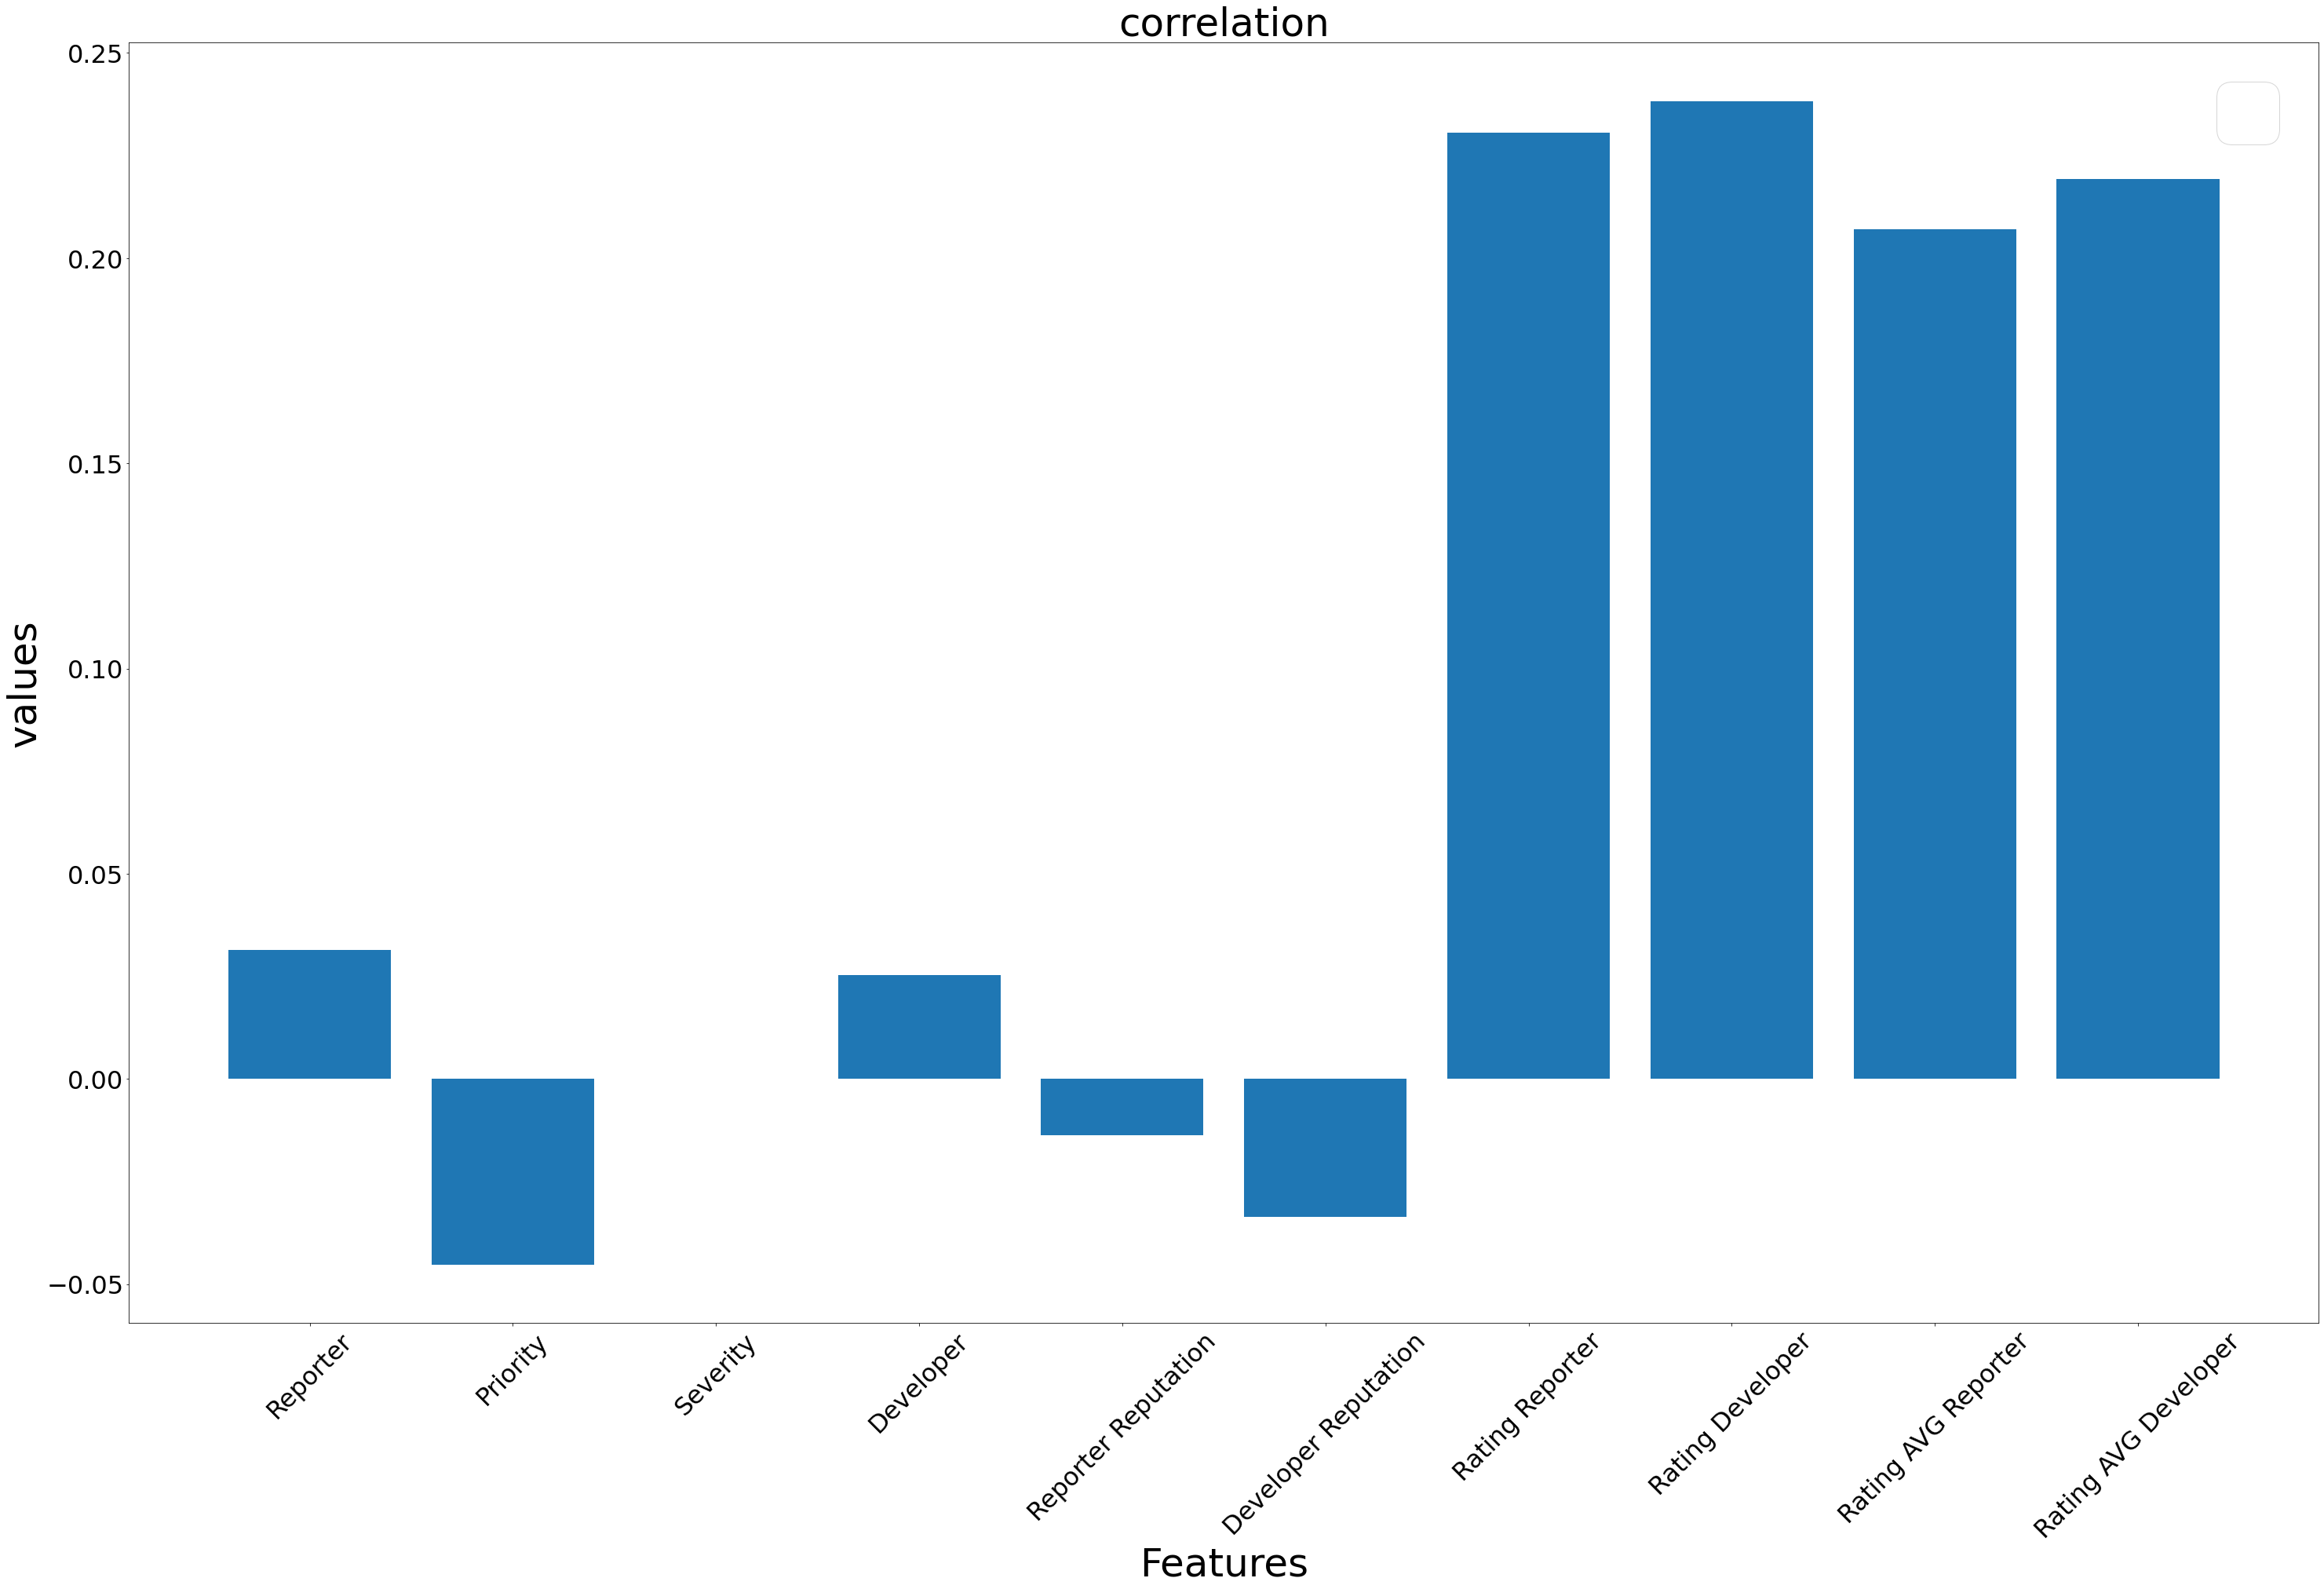

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams.update({'font.size': 32})


features = ['Reporter', 'Priority', 'Severity', 'Developer', 'Reporter Reputation', 'Developer Reputation', 'Rating Reporter', 'Rating Developer', 'Rating AVG Reporter', 'Rating AVG Developer']
values = [v_reporter.correlation, v_priority.correlation, v_bug_severity.correlation, v_assigned_to.correlation,  v_reporter_reputation.correlation, v_developer_reputation.correlation, v_rating_user.correlation, v_rating_developer.correlation,  v_rating_avg_reporter.correlation, v_rating_avg_developer.correlation]

plt.figure(figsize=(50,30))

# creating the bar plot
plt.bar(features, values)

plt.xlabel("Features", fontsize = 50)
plt.ylabel("values", fontsize = 50)
plt.title("correlation", fontsize = 50)
plt.xticks(rotation=45)
plt.legend(fontsize = 100)

plt.show()

#Texts

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(stem_words)

In [ ]:
def getchunks(iterable, chunk_size):
    size = len(iterable)
    if size < chunk_size:
        yield iterable
    chunks_nb = int(size / chunk_size)
    iter_ints = range(0, chunks_nb)
    for i in iter_ints:
        j = i * chunk_size
        if i+1 < chunks_nb:
            k = j + chunk_size
            yield iterable[j:k]
        else:
            yield iterable[j:]

In [ ]:
bugfixclass['summary_plus_comment']= bugfixclass['short_desc']+" " +bugfixclass['comments']

In [ ]:
bugfixclass['summary_plus_comment_tok']= np.array(bugfixclass['summary_plus_comment'].map(lambda s:preprocess(s)))

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

In [ ]:
dtm_chunked = []
for chunk in getchunks(bugfixclass['summary_plus_comment_tok'], bugfixclass.shape[0]):
    dtm_chunked.append(tfidf.fit_transform(chunk))

In [ ]:
# matrices concates
from scipy import sparse
dtm = sparse.vstack(dtm_chunked)

In [ ]:
X_text = pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Cosine Similarity

In [ ]:
indices = pd.Series(bugfixclass.index, index=bugfixclass['bug_id']).drop_duplicates()

In [ ]:
bugfixclass.index

RangeIndex(start=0, stop=3414, step=1)

In [ ]:
cosine_sim = 0

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
def calcule_similarity_text(matriz):
  return linear_kernel(matriz, matriz)

In [ ]:
def content_recommender(bug_id, cosine_sim=cosine_sim, df=bugfixclass, indices=indices):
  idx = indices[bug_id]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  if len(sim_scores) > 5:
    sim_scores = sim_scores[1:4]
  else:
    sim_scores = sim_scores[1:len(sim_scores)+1]
  #bug_indices = [i[0] for i in sim_scores]

  bug_indices = []
  for i in sim_scores:
    if i[1] > 0.1:
      bug_indices.append(i[0])
  rating = -1
  media = -1
  media_ratings = -1
  if len(bug_indices) > 1:
    media = np.average(bugfixclass['days'].iloc[bug_indices])
    media_ratings = np.average(bugfixclass['ratings'].iloc[bug_indices])
    rating = bugfixclass['ratings'].iloc[bug_indices[0]]
  return media, rating, media_ratings

In [ ]:
bugfixclass['similar_avg_day']= -1
bugfixclass['similar_top_rating']= -1
bugfixclass['similar_avg_ratings']= -1


In [ ]:
text_similarity =[]

for indexz, bug in bugfixclass.iterrows() :
  if indexz > 0:
    indice = indexz+1
    text_similarity = calcule_similarity_text(X_text[0:indice])
    s= content_recommender(bug['bug_id'], text_similarity, bugfixclass, indices)
    bugfixclass.loc[(bugfixclass['bug_id'] == bug['bug_id']), 'similar_avg_day'], bugfixclass.loc[(bugfixclass['bug_id'] == bug['bug_id']), 'similar_top_rating'], bugfixclass.loc[(bugfixclass['bug_id'] == bug['bug_id']), 'similar_avg_ratings']  = s


#
- criar um dataset mini para testar antes de colocar todos os bugs
- Testar o mais similar (retornar o rating)
- testar os k mais similares (testar com 3) média de dias ou media de ratings
- Replicar o artigo do Ramarao 'Impact of Bug Reporter’s Reputation on Bug-fix Times'
- Replicar artigo do Zhang
- a diferença do modelo de Ramarao e o meu é que não uso a quantidade de bugs mas sim o tempo e o work load



# Verificar
Chisquare, Gain Ratio and Information Gain

#Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [ ]:
bugfixclass['priority_n']  = ordinal_encoder.fit_transform(bugfixclass['priority'].values.reshape(-1,1))

In [ ]:
bugfixclass['priority_n']

0       0.0
1       2.0
2       0.0
3       2.0
4       2.0
       ... 
3409    2.0
3410    2.0
3411    1.0
3412    2.0
3413    1.0
Name: priority_n, Length: 3414, dtype: float64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bugfixclass['op_sys_n'] = le.fit_transform(bugfixclass['op_sys'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
bugfixclass['severity_n']  = ordinal_encoder.fit_transform(bugfixclass['bug_severity'].values.reshape(-1,1))

In [ ]:
bugfixclass['classification'].value_counts()

1.0    1707
0.0    1707
Name: classification, dtype: int64

In [ ]:
#Export to CSV
bugfixclass.to_csv(nameDataset)
if dataset == 'N':
  bugfixclass.to_csv('netbeans_clean.csv')
   bugfixclass.to_csv(nameDataset+'clean_new.csv')
else:
  bugfixclass.to_csv('eclipse_clean.csv')
